In [2]:
import pandas as pd
ETH = pd.read_pickle("Binance_ETHUSDT_start_20170817_0401_end_20230625_1835.pkl", compression='infer', storage_options=None)
ARB = pd.read_pickle("Binance_ARBUSDT_start_20230323_1501_end_20230626_1330.pkl", compression='infer', storage_options=None)


In [3]:

ETH = ETH.rename(columns={"close": "ETH"})


In [4]:
ETH.head()

,timestamp,ETH
Datetime,,
2017-08-17 04:01:00,1.502942e+09,301.13
2017-08-17 04:02:00,1.502943e+09,301.13
2017-08-17 04:03:00,1.502943e+09,300.00
2017-08-17 04:04:00,1.502943e+09,300.00
2017-08-17 04:05:00,1.502943e+09,301.13


In [5]:
ETH.index

DatetimeIndex(['2017-08-17 04:01:00', '2017-08-17 04:02:00',
               '2017-08-17 04:03:00', '2017-08-17 04:04:00',
               '2017-08-17 04:05:00', '2017-08-17 04:06:00',
               '2017-08-17 04:07:00', '2017-08-17 04:08:00',
               '2017-08-17 04:09:00', '2017-08-17 04:10:00',
               ...
               '2023-06-25 18:26:00', '2023-06-25 18:27:00',
               '2023-06-25 18:28:00', '2023-06-25 18:29:00',
               '2023-06-25 18:30:00', '2023-06-25 18:31:00',
               '2023-06-25 18:32:00', '2023-06-25 18:33:00',
               '2023-06-25 18:34:00', '2023-06-25 18:35:00'],
              dtype='datetime64[ns]', name='Datetime', length=3070963, freq=None)

In [6]:
ETH.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3070963 entries, 2017-08-17 04:01:00 to 2023-06-25 18:35:00
Data columns (total 2 columns):
 #   Column     Dtype  
---  ------     -----  
 0   timestamp  float64
 1   ETH        float64
dtypes: float64(2)
memory usage: 70.3 MB


In [7]:
ETH.reset_index(inplace=True)

In [8]:
ETH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3070963 entries, 0 to 3070962
Data columns (total 3 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Datetime   datetime64[ns]
 1   timestamp  float64       
 2   ETH        float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 70.3 MB


In [9]:
ETH.head()

,Datetime,timestamp,ETH
0,2017-08-17 04:01:00,1.502942e+09,301.13
1,2017-08-17 04:02:00,1.502943e+09,301.13
2,2017-08-17 04:03:00,1.502943e+09,300.00
3,2017-08-17 04:04:00,1.502943e+09,300.00
4,2017-08-17 04:05:00,1.502943e+09,301.13


In [10]:

ARB = ARB.rename(columns={"close": "ARB"})
ARB.reset_index(inplace=True)
ARB.head()

,Datetime,timestamp,ARB
0,2023-03-23 15:01:00,1.679584e+09,1.3211
1,2023-03-23 15:02:00,1.679584e+09,1.3974
2,2023-03-23 15:03:00,1.679584e+09,1.2905
3,2023-03-23 15:04:00,1.679584e+09,1.3239
4,2023-03-23 15:05:00,1.679584e+09,1.3517


In [11]:
df = pd.merge(ETH, ARB, on='Datetime', how='inner')

In [12]:
df.head()

,Datetime,timestamp_x,ETH,timestamp_y,ARB
0,2023-03-23 15:01:00,1.679584e+09,1819.01,1.679584e+09,1.3211
1,2023-03-23 15:02:00,1.679584e+09,1814.93,1.679584e+09,1.3974
2,2023-03-23 15:03:00,1.679584e+09,1814.04,1.679584e+09,1.2905
3,2023-03-23 15:04:00,1.679584e+09,1818.12,1.679584e+09,1.3239
4,2023-03-23 15:05:00,1.679584e+09,1814.44,1.679584e+09,1.3517


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135495 entries, 0 to 135494
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Datetime     135495 non-null  datetime64[ns]
 1   timestamp_x  135495 non-null  float64       
 2   ETH          135495 non-null  float64       
 3   timestamp_y  135495 non-null  float64       
 4   ARB          135495 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 5.2 MB


In [14]:
# For data manipulation
import numpy as np
import pandas as pd

# For datetime manipulation
import datetime

# For data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

/tmp/ipykernel_1665/779156058.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


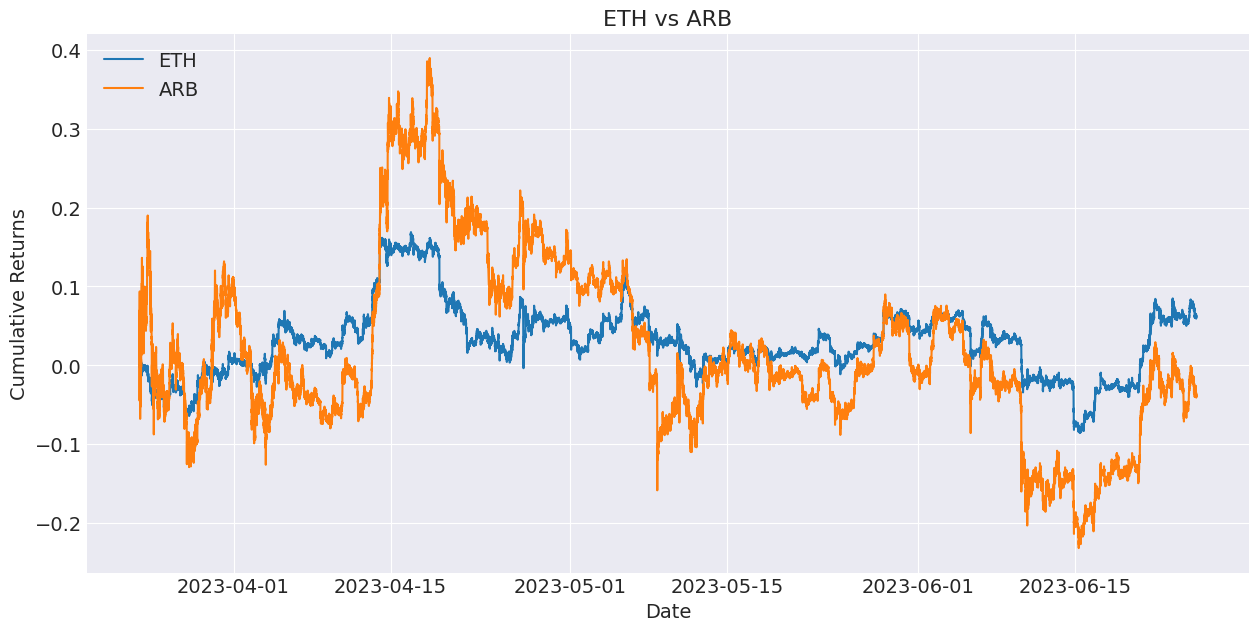

In [15]:
# Set figure size
plt.figure(figsize=(15, 7))

# Plot and compare ETH and ARB
df['peth'] = df.ETH.pct_change().cumsum().ffill()
df['parb'] = df.ARB.pct_change().cumsum().ffill()
plt.plot(df.Datetime, df.peth, label='ETH')
plt.plot(df.Datetime, df.parb, label='ARB')

# Set the title, labels, and sizes
plt.title('ETH vs ARB', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Returns', fontsize=14)
plt.tick_params(axis='both', labelsize=14)
plt.legend(loc='upper left', fontsize=14)
plt.show()

### Hedge Ratio

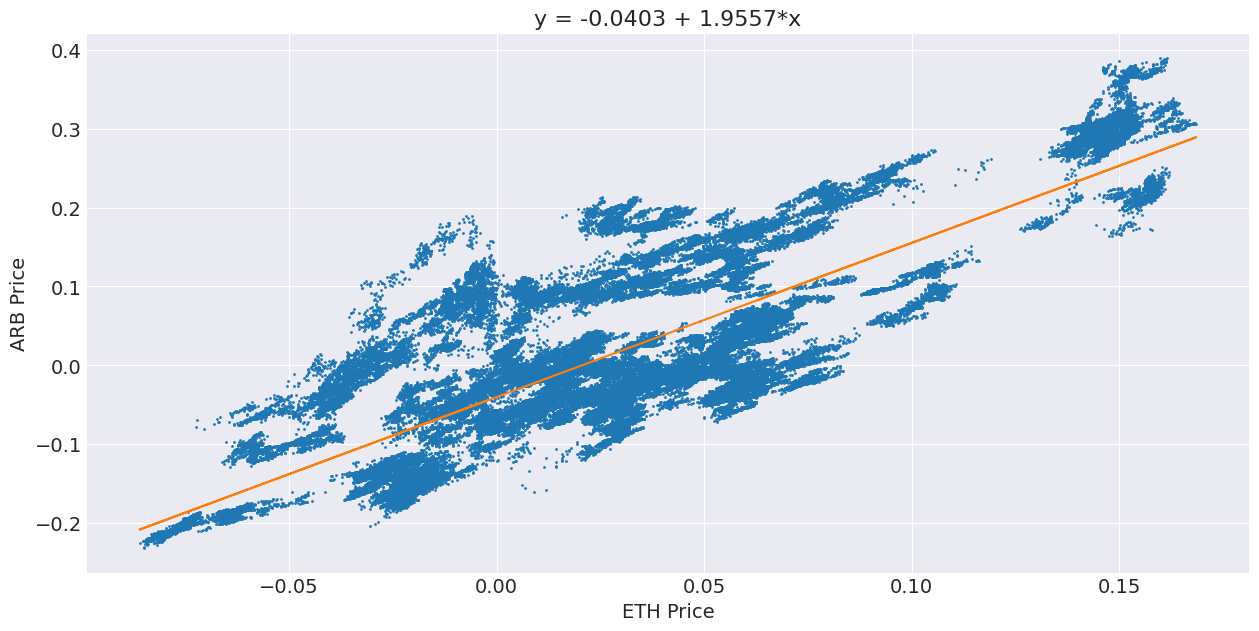

In [16]:
# Set figure size
plt.figure(figsize=(15, 7))

# Plot the correlation between ETH and ARB 
plt.plot(df.peth, df.parb, 'o', markersize= 1)

# Linear fit of the data
m = np.polyfit(df.peth.dropna(),
               df.parb.dropna(), 1)
xx = df.peth
yy = np.polyval(m, xx)
plt.plot(xx, yy)
plt.title

# Set the title, labels, and sizes
plt.title(f'y = {m[1]:.4f} + {m[0]:.4f}*x', fontsize=16)
plt.xlabel('ETH Price', fontsize=14)
plt.ylabel('ARB Price', fontsize=14)
plt.tick_params(axis='both', labelsize=14)
plt.show()

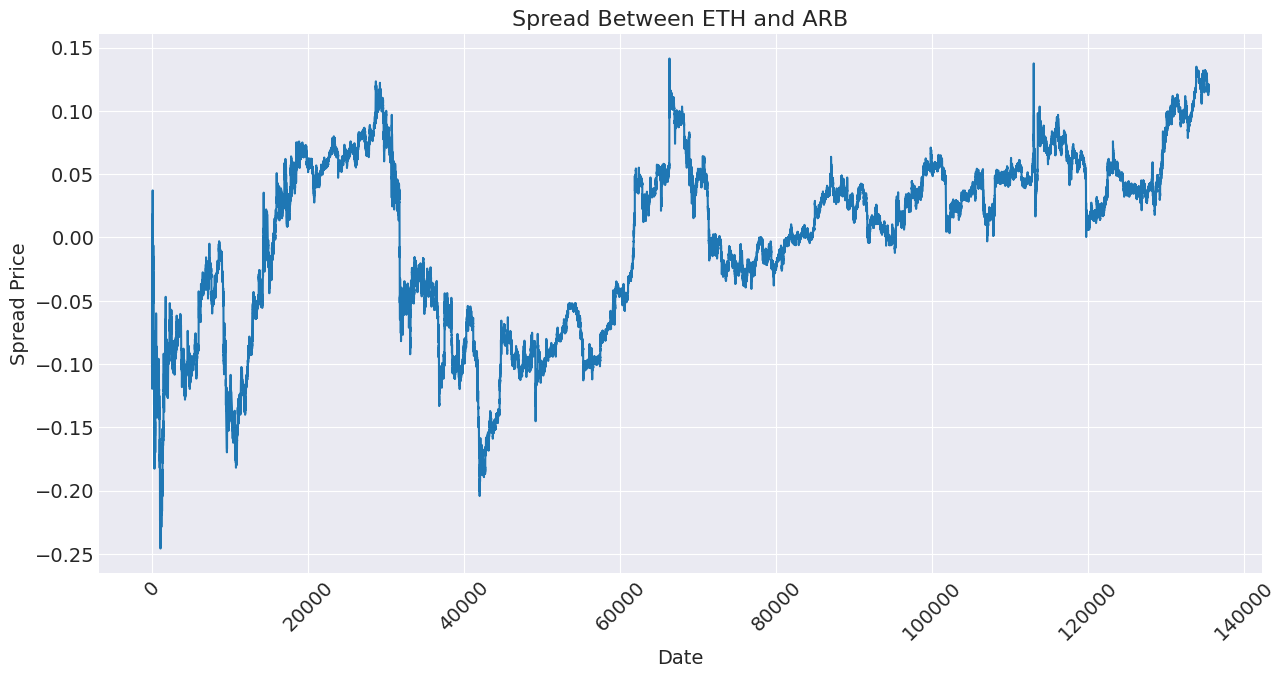

In [17]:
# Set figure size
plt.figure(figsize=(15, 7))

# Create a spread between ETH and SPY using the parameters
# from the linear fit
spread = m[0]*df.peth-df.parb+m[1]

# Plot the price of the spread and observe mean reversion
plt.plot(spread)
plt.xticks(rotation=45)

# Set the title, labels, and sizes
plt.title('Spread Between ETH and ARB', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Spread Price', fontsize=14)
plt.tick_params(axis='both', labelsize=14)
plt.show()

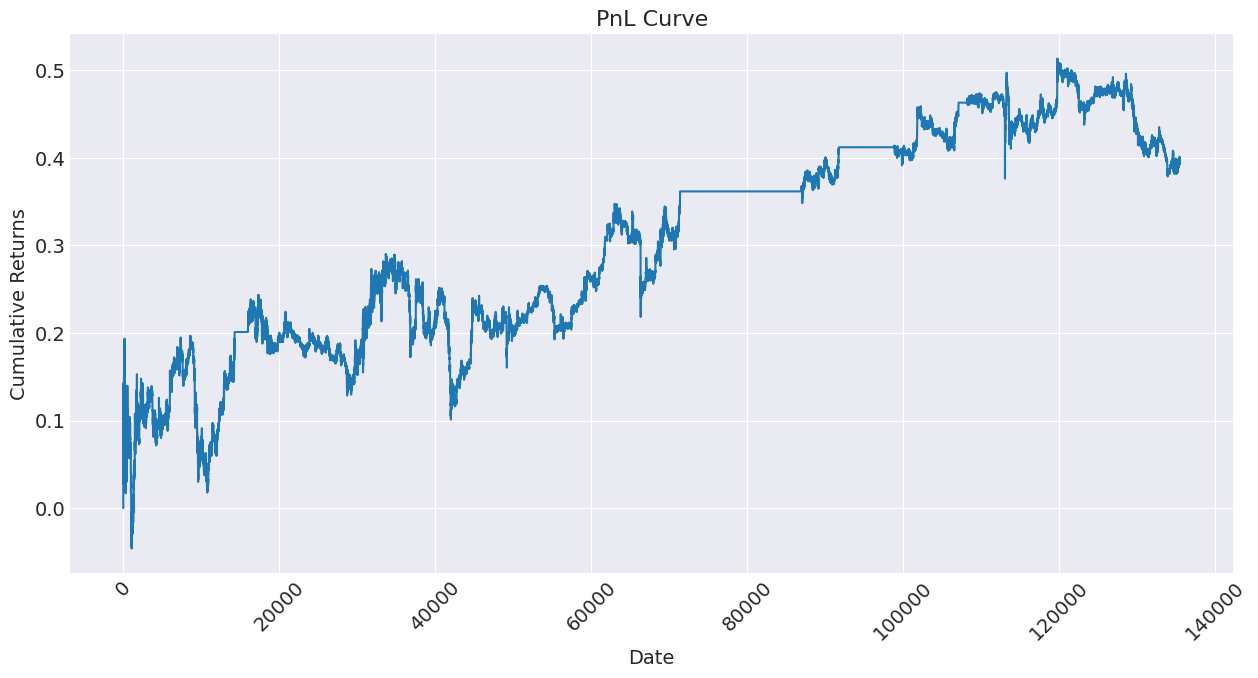

In [18]:
# Backtesting a RSP/SPY pairs trade
inpos = 0  # Indicates our position. -1: short spread, +1: long spread
pnls = []  # List that collects PnLs
th = 0.05  # Threshold for entering a trade

# Loop through spread prices
for i in range(2, len(spread)):

    # Append PnL, must be done before today's position is updated
    pnls.append(spread.diff().iloc[i] * inpos)

    # Short entry if spread price exceeds threshold
    # and we are not in a position
    if not inpos and spread.iloc[i] > th:
        inpos = -1

    # Short exit spread goes below zero and
    # we are short
    elif inpos == -1 and spread.iloc[i] < 0:
        inpos = 0

    # Long entry as above
    elif not inpos and spread.iloc[i] < -th:
        inpos = 1

    # Long exit as above
    elif inpos == 1 and spread.iloc[i] > 0:
        inpos = 0

# Set figure size
plt.figure(figsize=(15, 7))

# Plot PnL curve
plt.plot(spread.index[2:], np.cumsum(pnls))
plt.xticks(rotation=45)

# Set the title, labels, and sizes
plt.title('PnL Curve', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Returns', fontsize=14)
plt.tick_params(axis='both', labelsize=14)
plt.show()